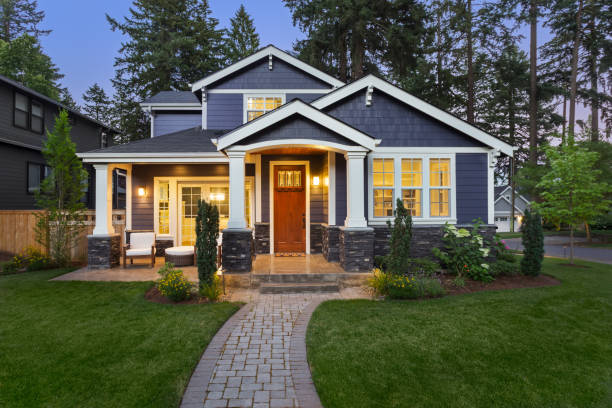

In [1]:
from IPython.display import Image
Image(filename='house.jpg',width=600, height=400)

In [2]:
#importing libraries


import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#importing datasets


trainset = pd.read_csv("train.csv")
testset = pd.read_csv("test.csv")

In [4]:
trainset.shape

(1460, 81)

In [5]:
testset.shape

(1459, 80)

In [6]:
#Since we need to Preprocess both the datasets, we will first concatenate them.


data = pd.concat([trainset.drop(['SalePrice'], axis=1), testset])
data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... ScreenPorch PoolArea PoolQC Fence MiscFeature  \
0         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
1         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
2         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
3         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
4         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  
0       0      2    2008        WD         Normal  
1       0      5    2007        WD         Normal  
2       0      9    2008        WD         Normal  
3       0      2    2006        WD        Abnorml  
4       0     12    2008        WD         Normal  

[5 rows x 80 columns]

In [7]:
data['MSZoning'] = data.MSZoning.fillna(data.MSZoning.mode()[0])
data['LotFrontage']=data['LotFrontage'].fillna(data['LotFrontage'].mean())
data['Utilities'] = data.Utilities.fillna(data.Utilities.mode()[0])
data['Exterior1st'] = data.Exterior1st.fillna(data.Exterior1st.mode()[0])
data['Exterior2nd'] = data.Exterior2nd.fillna(data.Exterior2nd.mode()[0])
data['MasVnrType'] = data.MasVnrType.fillna(data.MasVnrType.mode()[0])
data['MasVnrArea']=data['MasVnrArea'].fillna(data['MasVnrArea'].mean())
data['BsmtQual'] = data.BsmtQual.fillna(data.BsmtQual.mode()[0])
data['BsmtCond'] = data.BsmtCond.fillna(data.BsmtCond.mode()[0])
data['BsmtExposure'] = data.BsmtExposure.fillna(data.BsmtExposure.mode()[0])
data['BsmtFinType1'] = data.BsmtFinType1.fillna(data.BsmtFinType1.mode()[0])
data['BsmtFinSF1']=data['BsmtFinSF1'].fillna(data['BsmtFinSF1'].mean())
data['BsmtFinType2'] = data.BsmtFinType1.fillna(data.BsmtFinType2.mode()[0])
data['BsmtFinSF2']=data['BsmtFinSF2'].fillna(data['BsmtFinSF2'].mean())
data['BsmtUnfSF']=data['BsmtUnfSF'].fillna(data['BsmtUnfSF'].mean())
data['TotalBsmtSF']=data['TotalBsmtSF'].fillna(data['TotalBsmtSF'].mean())
data['Electrical'] = data.Electrical.fillna(data.Electrical.mode()[0])
data['BsmtFullBath'] = data.BsmtFullBath.fillna(data.BsmtFullBath.mode()[0])
data['BsmtHalfBath'] = data.BsmtHalfBath.fillna(data.BsmtHalfBath.mode()[0])
data['KitchenQual'] = data.KitchenQual.fillna(data.KitchenQual.mode()[0])
data['Functional'] = data.Functional.fillna(data.Functional.mode()[0])
data['GarageType'] = data.GarageType.fillna(data.GarageType.mode()[0])
data['GarageYrBlt'] = data.GarageYrBlt.fillna(data.GarageYrBlt.mode()[0])
data['GarageFinish'] = data.GarageFinish.fillna(data.GarageFinish.mode()[0])
data['GarageCars'] = data.GarageCars.fillna(data.GarageCars.mode()[0])
data['GarageArea']=data['GarageArea'].fillna(data['GarageArea'].mean())
data['GarageQual'] = data.GarageQual.fillna(data.GarageQual.mode()[0])
data['GarageCond'] = data.GarageCond.fillna(data.GarageCond.mode()[0])
data['SaleType'] = data.SaleType.fillna(data.SaleType.mode()[0])

data.drop(['Alley'], axis=1, inplace=True)
data.drop(['MiscFeature'], axis=1, inplace=True)

data.shape

(2919, 78)

In [8]:
data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0   1          60       RL         65.0     8450   Pave      Reg         Lvl   
1   2          20       RL         80.0     9600   Pave      Reg         Lvl   
2   3          60       RL         68.0    11250   Pave      IR1         Lvl   
3   4          70       RL         60.0     9550   Pave      IR1         Lvl   
4   5          60       RL         84.0    14260   Pave      IR1         Lvl   

  Utilities LotConfig  ... 3SsnPorch ScreenPorch PoolArea PoolQC Fence  \
0    AllPub    Inside  ...         0           0        0    NaN   NaN   
1    AllPub       FR2  ...         0           0        0    NaN   NaN   
2    AllPub    Inside  ...         0           0        0    NaN   NaN   
3    AllPub    Corner  ...         0           0        0    NaN   NaN   
4    AllPub       FR2  ...         0           0        0    NaN   NaN   

  MiscVal  MoSold  YrSold  SaleType  SaleCondition  
0       0       2    2008        WD         Normal  
1       0       5    2007        WD         Normal  
2       0       9    2008        WD         Normal  
3       0       2    2006        WD        Abnorml  
4       0      12    2008        WD         Normal  

[5 rows x 78 columns]

In [9]:
data.drop(['PoolQC'], axis=1, inplace=True)
data.drop(['Fence'], axis=1, inplace=True)

In [10]:
dummyvariables = pd.get_dummies(data, drop_first=True)
dummyvariables.to_csv('dummyvariables.csv', index=False)
dummyvariables.head()

Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0   1          60         65.0     8450            7            5       2003   
1   2          20         80.0     9600            6            8       1976   
2   3          60         68.0    11250            7            5       2001   
3   4          70         60.0     9550            7            5       1915   
4   5          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  SaleType_ConLI  SaleType_ConLw  \
0          2003       196.0       706.0  ...               0               0   
1          1976         0.0       978.0  ...               0               0   
2          2002       162.0       486.0  ...               0               0   
3          1970         0.0       216.0  ...               0               0   
4          2000       350.0       655.0  ...               0               0   

   SaleType_New  SaleType_Oth  SaleType_WD  SaleCondition_AdjLand  \
0             0             0            1                      0   
1             0             0            1                      0   
2             0             0            1                      0   
3             0             0            1                      0   
4             0             0            1                      0   

   SaleCondition_Alloca  SaleCondition_Family  SaleCondition_Normal  \
0                     0                     0                     1   
1                     0                     0                     1   
2                     0                     0                     1   
3                     0                     0                     0   
4                     0                     0                     1   

   SaleCondition_Partial  
0                      0  
1                      0  
2                      0  
3                      0  
4                      0  

[5 rows x 237 columns]

In [11]:
#Split your data back to train and test set

trainset_saleprice = trainset.SalePrice
trainset_saleprice.to_csv('saleprice_data.csv', index=False)

data_train = dummyvariables.iloc[:1460]
data_test = dummyvariables.iloc[1460:]

X=data_train.values
test = data_test.values
Y= trainset_saleprice.values

In [12]:
#Setting up hyperparameter grid

import xgboost as xgb
##from sklearn.model_selection import GridSearchCV

##dep = np.arange(1,9)
##param_grid={'max_depth' : dep}

#decision tree classifier
##classifiers = tree.DecisionTreeClassifier()

##clf_cv = GridSearchCV(classifiers, param_grid=param_grid,cv=5)

##clf_cv.fit(X,Y)

# Print the tuned parameter and score
##print("Tuned Decision Tree Parameters: {}".format(clf_cv.best_params_))
##print("Best score is {}".format(clf_cv.best_score_))

model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)

model_xgb.fit(X, Y)
xgb_train_pred = model_xgb.predict(data_train)
xgb_pred = np.expm1(model_xgb.predict(data_test))
print(rmsle(y_train, xgb_train_pred))

C:\Users\BUCHHOME\Anaconda3\lib\site-packages\dask\config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
C:\Users\BUCHHOME\Anaconda3\lib\site-packages\dask\dataframe\utils.py:13: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
C:\Users\BUCHHOME\Anaconda3\lib\site-packages\distributed\config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


[19:58:58] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




ValueError: feature_names mismatch: ['f0', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10', 'f11', 'f12', 'f13', 'f14', 'f15', 'f16', 'f17', 'f18', 'f19', 'f20', 'f21', 'f22', 'f23', 'f24', 'f25', 'f26', 'f27', 'f28', 'f29', 'f30', 'f31', 'f32', 'f33', 'f34', 'f35', 'f36', 'f37', 'f38', 'f39', 'f40', 'f41', 'f42', 'f43', 'f44', 'f45', 'f46', 'f47', 'f48', 'f49', 'f50', 'f51', 'f52', 'f53', 'f54', 'f55', 'f56', 'f57', 'f58', 'f59', 'f60', 'f61', 'f62', 'f63', 'f64', 'f65', 'f66', 'f67', 'f68', 'f69', 'f70', 'f71', 'f72', 'f73', 'f74', 'f75', 'f76', 'f77', 'f78', 'f79', 'f80', 'f81', 'f82', 'f83', 'f84', 'f85', 'f86', 'f87', 'f88', 'f89', 'f90', 'f91', 'f92', 'f93', 'f94', 'f95', 'f96', 'f97', 'f98', 'f99', 'f100', 'f101', 'f102', 'f103', 'f104', 'f105', 'f106', 'f107', 'f108', 'f109', 'f110', 'f111', 'f112', 'f113', 'f114', 'f115', 'f116', 'f117', 'f118', 'f119', 'f120', 'f121', 'f122', 'f123', 'f124', 'f125', 'f126', 'f127', 'f128', 'f129', 'f130', 'f131', 'f132', 'f133', 'f134', 'f135', 'f136', 'f137', 'f138', 'f139', 'f140', 'f141', 'f142', 'f143', 'f144', 'f145', 'f146', 'f147', 'f148', 'f149', 'f150', 'f151', 'f152', 'f153', 'f154', 'f155', 'f156', 'f157', 'f158', 'f159', 'f160', 'f161', 'f162', 'f163', 'f164', 'f165', 'f166', 'f167', 'f168', 'f169', 'f170', 'f171', 'f172', 'f173', 'f174', 'f175', 'f176', 'f177', 'f178', 'f179', 'f180', 'f181', 'f182', 'f183', 'f184', 'f185', 'f186', 'f187', 'f188', 'f189', 'f190', 'f191', 'f192', 'f193', 'f194', 'f195', 'f196', 'f197', 'f198', 'f199', 'f200', 'f201', 'f202', 'f203', 'f204', 'f205', 'f206', 'f207', 'f208', 'f209', 'f210', 'f211', 'f212', 'f213', 'f214', 'f215', 'f216', 'f217', 'f218', 'f219', 'f220', 'f221', 'f222', 'f223', 'f224', 'f225', 'f226', 'f227', 'f228', 'f229', 'f230', 'f231', 'f232', 'f233', 'f234', 'f235', 'f236'] ['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'Street_Pave', 'LotShape_IR2', 'LotShape_IR3', 'LotShape_Reg', 'LandContour_HLS', 'LandContour_Low', 'LandContour_Lvl', 'Utilities_NoSeWa', 'LotConfig_CulDSac', 'LotConfig_FR2', 'LotConfig_FR3', 'LotConfig_Inside', 'LandSlope_Mod', 'LandSlope_Sev', 'Neighborhood_Blueste', 'Neighborhood_BrDale', 'Neighborhood_BrkSide', 'Neighborhood_ClearCr', 'Neighborhood_CollgCr', 'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_Gilbert', 'Neighborhood_IDOTRR', 'Neighborhood_MeadowV', 'Neighborhood_Mitchel', 'Neighborhood_NAmes', 'Neighborhood_NPkVill', 'Neighborhood_NWAmes', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_OldTown', 'Neighborhood_SWISU', 'Neighborhood_Sawyer', 'Neighborhood_SawyerW', 'Neighborhood_Somerst', 'Neighborhood_StoneBr', 'Neighborhood_Timber', 'Neighborhood_Veenker', 'Condition1_Feedr', 'Condition1_Norm', 'Condition1_PosA', 'Condition1_PosN', 'Condition1_RRAe', 'Condition1_RRAn', 'Condition1_RRNe', 'Condition1_RRNn', 'Condition2_Feedr', 'Condition2_Norm', 'Condition2_PosA', 'Condition2_PosN', 'Condition2_RRAe', 'Condition2_RRAn', 'Condition2_RRNn', 'BldgType_2fmCon', 'BldgType_Duplex', 'BldgType_Twnhs', 'BldgType_TwnhsE', 'HouseStyle_1.5Unf', 'HouseStyle_1Story', 'HouseStyle_2.5Fin', 'HouseStyle_2.5Unf', 'HouseStyle_2Story', 'HouseStyle_SFoyer', 'HouseStyle_SLvl', 'RoofStyle_Gable', 'RoofStyle_Gambrel', 'RoofStyle_Hip', 'RoofStyle_Mansard', 'RoofStyle_Shed', 'RoofMatl_CompShg', 'RoofMatl_Membran', 'RoofMatl_Metal', 'RoofMatl_Roll', 'RoofMatl_Tar&Grv', 'RoofMatl_WdShake', 'RoofMatl_WdShngl', 'Exterior1st_AsphShn', 'Exterior1st_BrkComm', 'Exterior1st_BrkFace', 'Exterior1st_CBlock', 'Exterior1st_CemntBd', 'Exterior1st_HdBoard', 'Exterior1st_ImStucc', 'Exterior1st_MetalSd', 'Exterior1st_Plywood', 'Exterior1st_Stone', 'Exterior1st_Stucco', 'Exterior1st_VinylSd', 'Exterior1st_Wd Sdng', 'Exterior1st_WdShing', 'Exterior2nd_AsphShn', 'Exterior2nd_Brk Cmn', 'Exterior2nd_BrkFace', 'Exterior2nd_CBlock', 'Exterior2nd_CmentBd', 'Exterior2nd_HdBoard', 'Exterior2nd_ImStucc', 'Exterior2nd_MetalSd', 'Exterior2nd_Other', 'Exterior2nd_Plywood', 'Exterior2nd_Stone', 'Exterior2nd_Stucco', 'Exterior2nd_VinylSd', 'Exterior2nd_Wd Sdng', 'Exterior2nd_Wd Shng', 'MasVnrType_BrkFace', 'MasVnrType_None', 'MasVnrType_Stone', 'ExterQual_Fa', 'ExterQual_Gd', 'ExterQual_TA', 'ExterCond_Fa', 'ExterCond_Gd', 'ExterCond_Po', 'ExterCond_TA', 'Foundation_CBlock', 'Foundation_PConc', 'Foundation_Slab', 'Foundation_Stone', 'Foundation_Wood', 'BsmtQual_Fa', 'BsmtQual_Gd', 'BsmtQual_TA', 'BsmtCond_Gd', 'BsmtCond_Po', 'BsmtCond_TA', 'BsmtExposure_Gd', 'BsmtExposure_Mn', 'BsmtExposure_No', 'BsmtFinType1_BLQ', 'BsmtFinType1_GLQ', 'BsmtFinType1_LwQ', 'BsmtFinType1_Rec', 'BsmtFinType1_Unf', 'BsmtFinType2_BLQ', 'BsmtFinType2_GLQ', 'BsmtFinType2_LwQ', 'BsmtFinType2_Rec', 'BsmtFinType2_Unf', 'Heating_GasA', 'Heating_GasW', 'Heating_Grav', 'Heating_OthW', 'Heating_Wall', 'HeatingQC_Fa', 'HeatingQC_Gd', 'HeatingQC_Po', 'HeatingQC_TA', 'CentralAir_Y', 'Electrical_FuseF', 'Electrical_FuseP', 'Electrical_Mix', 'Electrical_SBrkr', 'KitchenQual_Fa', 'KitchenQual_Gd', 'KitchenQual_TA', 'Functional_Maj2', 'Functional_Min1', 'Functional_Min2', 'Functional_Mod', 'Functional_Sev', 'Functional_Typ', 'FireplaceQu_Fa', 'FireplaceQu_Gd', 'FireplaceQu_Po', 'FireplaceQu_TA', 'GarageType_Attchd', 'GarageType_Basment', 'GarageType_BuiltIn', 'GarageType_CarPort', 'GarageType_Detchd', 'GarageFinish_RFn', 'GarageFinish_Unf', 'GarageQual_Fa', 'GarageQual_Gd', 'GarageQual_Po', 'GarageQual_TA', 'GarageCond_Fa', 'GarageCond_Gd', 'GarageCond_Po', 'GarageCond_TA', 'PavedDrive_P', 'PavedDrive_Y', 'SaleType_CWD', 'SaleType_Con', 'SaleType_ConLD', 'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal', 'SaleCondition_Partial']
expected f175, f132, f201, f72, f55, f87, f34, f150, f93, f54, f130, f26, f83, f165, f85, f189, f139, f218, f100, f140, f212, f206, f151, f17, f205, f171, f143, f25, f220, f51, f198, f43, f227, f229, f204, f174, f96, f32, f153, f46, f118, f200, f30, f109, f102, f106, f162, f160, f186, f190, f137, f191, f82, f99, f202, f234, f180, f124, f187, f185, f117, f80, f98, f147, f215, f37, f29, f1, f158, f131, f40, f182, f156, f4, f69, f18, f114, f235, f111, f231, f77, f163, f59, f122, f44, f50, f76, f230, f65, f16, f22, f101, f133, f64, f123, f155, f194, f49, f63, f66, f70, f121, f169, f20, f56, f223, f226, f129, f33, f8, f172, f74, f164, f71, f136, f146, f27, f203, f233, f73, f110, f19, f48, f92, f0, f5, f232, f127, f144, f135, f7, f149, f112, f183, f62, f86, f214, f15, f60, f52, f125, f216, f168, f42, f79, f94, f57, f45, f88, f90, f41, f116, f179, f161, f181, f213, f9, f58, f210, f47, f89, f105, f199, f39, f170, f10, f108, f134, f152, f209, f3, f35, f75, f177, f81, f141, f61, f154, f178, f184, f11, f142, f128, f38, f13, f138, f6, f173, f145, f36, f211, f119, f166, f148, f113, f126, f95, f195, f217, f236, f115, f23, f21, f207, f14, f219, f24, f193, f221, f228, f28, f2, f31, f107, f91, f192, f67, f78, f222, f84, f103, f157, f176, f68, f188, f196, f225, f53, f167, f208, f224, f159, f120, f12, f97, f104, f197 in input data
training data did not have the following fields: Id, TotalBsmtSF, GarageFinish_Unf, Exterior1st_Wd Sdng, HouseStyle_2Story, 2ndFlrSF, Exterior1st_AsphShn, Electrical_FuseF, Heating_Wall, HeatingQC_Po, BsmtHalfBath, Neighborhood_Gilbert, RoofStyle_Shed, SaleCondition_AdjLand, GrLivArea, RoofMatl_WdShake, MSZoning_RH, BsmtQual_Gd, BsmtQual_TA, BsmtCond_TA, Electrical_Mix, GarageFinish_RFn, GarageQual_Gd, MSSubClass, EnclosedPorch, SaleType_Oth, BsmtFinType2_Unf, HeatingQC_TA, LotFrontage, BsmtCond_Gd, OpenPorchSF, SaleCondition_Partial, Neighborhood_NWAmes, Functional_Min1, Foundation_PConc, Neighborhood_OldTown, Electrical_FuseP, GarageType_Basment, HouseStyle_2.5Fin, RoofMatl_Membran, SaleType_WD, RoofStyle_Gable, GarageCond_Po, Neighborhood_ClearCr, ExterCond_Fa, MiscVal, MasVnrArea, Exterior2nd_CBlock, MasVnrType_Stone, Neighborhood_StoneBr, HouseStyle_SLvl, ExterCond_Po, BsmtFinSF1, Condition1_Feedr, BsmtFinType2_GLQ, Neighborhood_Blueste, Exterior1st_MetalSd, Functional_Sev, MSZoning_FV, Exterior2nd_Wd Shng, SaleCondition_Family, Condition1_Norm, LotShape_Reg, Exterior1st_CemntBd, SaleCondition_Alloca, Heating_Grav, PoolArea, SaleType_New, Neighborhood_Sawyer, ExterCond_Gd, BsmtUnfSF, RoofStyle_Hip, Exterior1st_BrkFace, Functional_Mod, CentralAir_Y, Condition1_PosN, GarageQual_Po, Neighborhood_Edwards, Exterior1st_HdBoard, Exterior1st_VinylSd, Heating_OthW, HouseStyle_1Story, Neighborhood_SawyerW, BldgType_Twnhs, Exterior1st_ImStucc, 3SsnPorch, Neighborhood_Veenker, MasVnrType_BrkFace, Exterior2nd_Brk Cmn, Neighborhood_IDOTRR, BsmtFinType1_Rec, BsmtFinType1_Unf, YearRemodAdd, BsmtExposure_Mn, BedroomAbvGr, Exterior2nd_BrkFace, KitchenQual_Fa, TotRmsAbvGrd, Exterior2nd_Stucco, RoofMatl_Roll, HouseStyle_1.5Unf, LandSlope_Mod, Fireplaces, SaleType_Con, Functional_Typ, GarageYrBlt, SaleType_ConLI, HeatingQC_Gd, Neighborhood_NPkVill, LandContour_HLS, Condition1_PosA, Exterior2nd_Other, BsmtFinType1_BLQ, SaleType_ConLw, SaleCondition_Normal, Condition2_PosN, Condition2_PosA, Street_Pave, Neighborhood_NAmes, Foundation_Wood, BsmtFinType2_LwQ, BldgType_TwnhsE, LotConfig_CulDSac, Neighborhood_MeadowV, HouseStyle_SFoyer, Exterior2nd_HdBoard, LotConfig_Inside, BsmtExposure_Gd, LotArea, BsmtFinType2_BLQ, Condition1_RRNe, Utilities_NoSeWa, GarageQual_TA, Neighborhood_BrkSide, 1stFlrSF, YearBuilt, ExterQual_Fa, Electrical_SBrkr, PavedDrive_P, WoodDeckSF, RoofMatl_Tar&Grv, Exterior2nd_CmentBd, SaleType_CWD, ExterCond_TA, GarageArea, BsmtFinType1_LwQ, FullBath, BldgType_2fmCon, Exterior2nd_MetalSd, YrSold, Condition2_RRAe, Condition2_Norm, FireplaceQu_Fa, Condition2_Feedr, Exterior1st_Stone, MSZoning_RL, Condition1_RRAe, Neighborhood_Timber, Exterior1st_BrkComm, Neighborhood_NoRidge, Neighborhood_Mitchel, ScreenPorch, Neighborhood_Somerst, Heating_GasW, GarageCars, Exterior1st_CBlock, Exterior2nd_Wd Sdng, LotConfig_FR3, Neighborhood_SWISU, BldgType_Duplex, KitchenQual_TA, GarageCond_Gd, GarageCond_TA, HouseStyle_2.5Unf, RoofMatl_CompShg, RoofMatl_Metal, Exterior2nd_VinylSd, LowQualFinSF, LotShape_IR2, FireplaceQu_Gd, GarageType_CarPort, Exterior1st_Plywood, Foundation_Slab, BsmtCond_Po, MasVnrType_None, FireplaceQu_Po, OverallCond, MSZoning_RM, Exterior2nd_Stone, Exterior1st_WdShing, LotConfig_FR2, KitchenQual_Gd, FireplaceQu_TA, Foundation_Stone, Exterior2nd_AsphShn, GarageCond_Fa, Exterior1st_Stucco, Neighborhood_CollgCr, Neighborhood_NridgHt, Foundation_CBlock, Condition1_RRAn, Exterior2nd_ImStucc, ExterQual_TA, BsmtFinSF2, GarageType_Detchd, ExterQual_Gd, GarageQual_Fa, LandContour_Lvl, PavedDrive_Y, BsmtExposure_No, KitchenAbvGr, Neighborhood_BrDale, BsmtFinType1_GLQ, LandSlope_Sev, Condition2_RRNn, HeatingQC_Fa, MoSold, BsmtFullBath, GarageType_Attchd, RoofMatl_WdShngl, Neighborhood_Crawfor, OverallQual, Exterior2nd_Plywood, SaleType_ConLD, RoofStyle_Gambrel, Functional_Maj2, Condition1_RRNn, Functional_Min2, HalfBath, Condition2_RRAn, BsmtQual_Fa, RoofStyle_Mansard, LotShape_IR3, LandContour_Low, GarageType_BuiltIn, BsmtFinType2_Rec, Heating_GasA